# Machine learning framework for prediction of patient-hospital readmission in US
### Part 2: Binary Classification Models
#### Author: Andrea Marcela Huerfano Barbosa 
##### Modified: 31th October

### Contents
* [I. Loading the final dataset](#I.-Loading-the-final-dataset)
* [II. Model Performance](#II.-Model-Performance)
* [III. Unbalanced dataset](#III.-Unbalanced-dataset)
    * [1.Logistic Regression](#1.-Logistic-Regression)
    * [2.Weighted Logistic Regression](#2.-Weighted-Logistic-Regression)
    * [3. Artificial Neuronal Network](#3.-Artificial-Neuronal-Network)
    
* [IV. Oversampling](#IV.-Oversampling )
    * [1. Logistic Regression](#1.-Logistic-Regression)
    * [2. KNeighbors](#2.-KNeighbors)
    * [3. Random Forest](#3.-Random-Forest)
    * [4. Decision Tree Classifier](#4.-Decision-Tree-Classifier)

### I. Loading the final dataset

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_regression
from collections import Counter
from imblearn.over_sampling import SMOTE
from yellowbrick.model_selection import FeatureImportances
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
import seaborn as sns
sns.set()

In [2]:
dataset=pd.read_csv('Clean_readmitted_oct31.csv')

In [3]:
dataset.head(n=3).T

,0,1,2
Unnamed: 0,4267,5827,67608
encounter_id,24437208,29758806,189899286
patient_nbr,135,378,729
time_in_hospital,8,2,4
num_lab_procedures,77,49,68
num_procedures,6,1,2
num_medications,33,11,23
number_outpatient,0,0,0
number_emergency,0,0,0
number_inpatient,0,0,0


## II. Model Performance

Since the readmission correspond to a binary classification. I am going to use the following metrics to compare the performance across the models:

- Confussion Matrix
- Accuracy

In [4]:
def model_performance(model_prediction):
    print(classification_report(y_test, model_prediction, digits=3))

    cfm = confusion_matrix(y_test, model_prediction)

    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    print('Confusion Matrix: \n', cfm, '\n')

    print('True Negative:', true_negative)
    print('False Positive:', false_positive)
    print('False Negative:', false_negative)
    print('True Positive:', true_positive)
    print('Correct Predictions', 
          round((true_negative + true_positive) / len(model_prediction) * 100, 1), '%')

### III. Unbalanced dataset
#### 1. Logistic Regression

In [5]:
X=dataset.drop([ 'Unnamed: 0','encounter_id', 'patient_nbr', 'gender_Male','readmitted'] , axis=1)
y=dataset['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print('Training samples: {}'.format(X_train.shape[0]))
print('Testing samples: {}'.format(X_test.shape[0]))
print('Number of features: {}'.format(X_train.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test)))

Training samples: 44956
Testing samples: 11239
Number of features: 52
Training outcome distribution: [41689  3267]
Testing outcome distribution: [10422   817]


In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000,random_state=0)
classifier.fit(X_train, y_train)
logistic_prediction = classifier.predict(X_test)

In [7]:
model_performance(logistic_prediction)

              precision    recall  f1-score   support

           0      0.928     0.999     0.962     10422
           1      0.333     0.004     0.007       817

    accuracy                          0.927     11239
   macro avg      0.630     0.502     0.485     11239
weighted avg      0.884     0.927     0.893     11239

Confusion Matrix: 
 [[10416     6]
 [  814     3]] 

True Negative: 10416
False Positive: 6
False Negative: 814
True Positive: 3
Correct Predictions 92.7 %


#### 2. Weighted Logistic Regression

In [8]:
X=dataset.drop([ 'Unnamed: 0','encounter_id', 'patient_nbr', 'gender_Male','readmitted'] , axis=1)
y=dataset['readmitted']

In [9]:
counts = np.bincount(y)
print("Number of positive samples in training data: {} ({:.2f}% of total)".format(
    counts[1], 100 * float(counts[1]) / len(y) ) )

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 4084 (7.27% of total)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [11]:
classifier = LogisticRegression(max_iter=500,random_state=0,class_weight='balanced') #solver='saga', penalty='l1'
# class_weight='balanced' class_weight = {0: weight_for_0, 1: weight_for_1}
#solver  ‘liblinear’ newton-cg saga
#penalty l1-saga
#iteraciones 100, 500
classifier.fit(X_train, y_train)
weight_logistic_prediction = classifier.predict(X_test)

In [12]:
model_performance(weight_logistic_prediction)

              precision    recall  f1-score   support

           0      0.954     0.662     0.782     10422
           1      0.122     0.596     0.202       817

    accuracy                          0.658     11239
   macro avg      0.538     0.629     0.492     11239
weighted avg      0.894     0.658     0.740     11239

Confusion Matrix: 
 [[6904 3518]
 [ 330  487]] 

True Negative: 6904
False Positive: 3518
False Negative: 330
True Positive: 487
Correct Predictions 65.8 %


#### (c) Xgboost

In [13]:
exgb_classifier = xgboost.XGBClassifier(max_depth=10, random_state=1)
exgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
exgb_prediction = exgb_classifier.predict(X_test)

In [15]:
model_performance(exgb_prediction)

              precision    recall  f1-score   support

           0      0.928     0.997     0.961     10422
           1      0.190     0.010     0.019       817

    accuracy                          0.925     11239
   macro avg      0.559     0.503     0.490     11239
weighted avg      0.874     0.925     0.893     11239

Confusion Matrix: 
 [[10388    34]
 [  809     8]] 

True Negative: 10388
False Positive: 34
False Negative: 809
True Positive: 8
Correct Predictions 92.5 %


#### 3. Artificial Neuronal Network

Number of positive samples in training data: 3243 (7.21% of total)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa_entrada (InputLayer)    [(None, 52)]              0         
_________________________________________________________________
activation (Activation)      (None, 52)                0         
_________________________________________________________________
primera_capa_oculta (Dense)  (None, 256)               13568     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
segunda_capa_oculta (Dense)  (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
____________________________________________________________

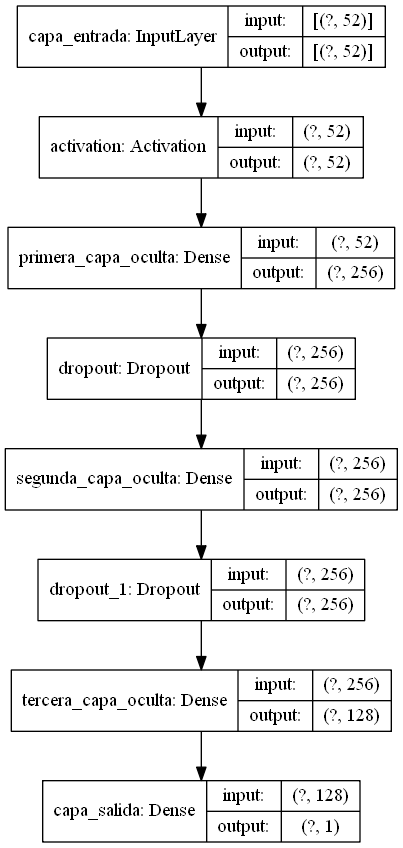

In [16]:
targets = y
targets = np.array(targets, dtype = 'uint8')
#targets.reshape((targets.shape[0],1))

features = np.array(X,dtype = 'float32' )
num_val_samples = int(len(features) * 0.2)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

scaler = StandardScaler()

scaler.fit(train_features)
train_features = scaler.transform(train_features)
val_features = scaler.transform(val_features )


counts = np.bincount(train_targets)
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

# Crea los pesos para el entrenamiento. Más peso a los menos frecuentes (1)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

inputs = Input(shape=(train_features.shape[1],),name='capa_entrada')

# vamos construyendo capa por capa
x = Activation('relu')(inputs)
x = Dense(256, activation='relu',name='primera_capa_oculta')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu',name='segunda_capa_oculta')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu',name='tercera_capa_oculta')(x)
outputs = Dense(1, activation='sigmoid', name='capa_salida')(x)

# Creamos ahora el modelo
model = Model(inputs=inputs, outputs=outputs)

model.summary()
plot_model(model, to_file='readmission_model.png', 
           show_shapes=True)

In [17]:
metrics = [
    FalseNegatives(name="fn"),
    FalsePositives(name="fp"),
    TrueNegatives(name="tn"),
    TruePositives(name="tp"),
    Precision(name="precision"),
    Recall(name="recall"),
]

model.compile(optimizer=Adam(0.0001), loss="binary_crossentropy", metrics=metrics)

In [18]:
callbacks = [callbacks.ModelCheckpoint("readmission_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=100,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
) ###El recall muestra la eficacia sobre lastransacciones fraudulentas

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 44956 samples, validate on 11239 samples
Epoch 1/100
44956/44956 - 5s - loss: 3.1885e-05 - fn: 2499.0000 - fp: 9166.0000 - tn: 32547.0000 - tp: 744.0000 - precision: 0.0751 - recall: 0.2294 - val_loss: 3.1578e-05 - val_fn: 561.0000 - val_fp: 2940.0000 - val_tn: 7458.0000 - val_tp: 280.0000 - val_precision: 0.0870 - val_recall: 0.3329
Epoch 2/100
44956/44956 - 2s - loss: 3.1248e-05 - fn: 1931.0000 - fp: 15054.0000 - tn: 26659.0000 - tp: 1312.0000 - precision: 0.0802 - recall: 0.4046 - val_loss: 3.1286e-05 - val_fn: 357.0000 - val_fp: 5544.0000 - val_tn: 4854.0000 - val_tp: 484.0000 - val_precision: 0.0803 - val_recall: 0.5755
Epoch 3/100
44956/44956 - 2s - loss: 3.1150e-05 - fn: 1530.0000 - fp: 20409.0000 - tn: 21304.0000 - tp: 1713.0000 - precision: 0.0774 - recall: 0.5282 - val_loss: 3.1182e-05 - val_fn: 228.0000 - val_fp: 6920.0000 - val_tn: 3478.0000 - val_tp: 613.0000 - val_precision: 0.0814 - val_recall: 0.7289
Epoch 4/100

In [19]:
# Predicting the Test set results
y_pred_val = model.predict(val_features)
y_pred_val[y_pred_val > 0.5] = 1
y_pred_val[y_pred_val <=0.5] = 0
y_pred_val.reshape((y_pred_val.shape[0]))
# predict the training set
y_pred_train = model.predict(train_features)
y_pred_train[y_pred_train > 0.5] = 1
y_pred_train[y_pred_train <=0.5] = 0
y_pred_train.reshape((y_pred_train.shape[0]))

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [20]:
# Squeezing
val_targets = np.squeeze(val_targets)
y_pred_val = np.squeeze(y_pred_val)
train_targets = np.squeeze(train_targets)
y_pred_train = np.squeeze(y_pred_train)

# False Negative Testing
fn_val = FalseNegatives()
fn_val.update_state(val_targets, y_pred_val)
fn_val = fn_val.result().numpy()

# False Negative Training
fn_train = FalseNegatives()
fn_train.update_state(train_targets, y_pred_train)
fn_train = fn_train.result().numpy()

#False Positive Testing
fp_val = FalsePositives()
fp_val.update_state(val_targets, y_pred_val)
fp_val = fp_val.result().numpy()
#
#False Positive Training
fp_train = FalsePositives()
fp_train.update_state(train_targets, y_pred_train)
fp_train = fp_train.result().numpy()

# Precision validación
pre_val = Precision()
pre_val.update_state(val_targets, y_pred_val)
pre_val = pre_val.result().numpy()

# Precision training
pre_train = Precision()
pre_train.update_state(train_targets, y_pred_train)
pre_train = pre_train.result().numpy()
#
# recall validation
re_val = Recall()
re_val.update_state(val_targets, y_pred_val)
re_val = re_val.result().numpy()
#
# recall testing
re_train = Recall()
re_train.update_state(train_targets, y_pred_train)
re_train = re_train.result().numpy()
# 

#metrics
metrics = {'False_positive_training':fp_train, 'False_positive_testing':fp_val,
           '%False_positives': np.round((fp_train+fp_val)/ len(X_train)*100,1),
           'Falses_negatives_training':fn_train, 'False_negatives_testing':fn_val,
           '%False_negatives': np.round((fn_train+fn_val)/ len(X_train)*100,1),
           'Precision_train': np.round(pre_train,2), 'Precision_testing': np.round(pre_val,2),
           'Recall_train': np.round(re_train,2), 'Recall_testing':np.round(re_val,2) }
metrics

{'False_positive_training': 15188.0,
 'False_positive_testing': 4118.0,
 '%False_positives': 42.9,
 'Falses_negatives_training': 1192.0,
 'False_negatives_testing': 334.0,
 '%False_negatives': 3.4,
 'Precision_train': 0.12,
 'Precision_testing': 0.11,
 'Recall_train': 0.63,
 'Recall_testing': 0.6}

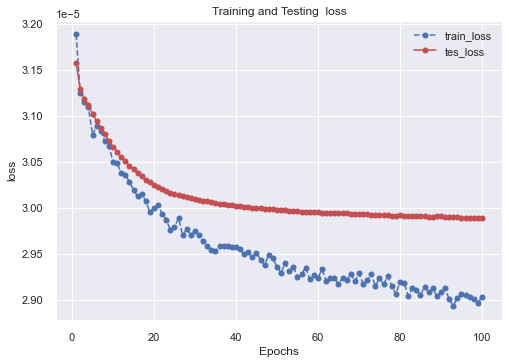

In [21]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    tes_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, tes_metrics, 'ro-')
    plt.title('Training and Testing  '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'tes_'+metric])
    plt.show()
plot_metric(history, 'loss')

## IV. Oversampling 

Unbalanced data substantially compromises the learning process, since most of the standard machine learning algorithms expect balanced class distribution or an equal misclassification cost  (He and Garcia, 2009). I worked with the package imbalanced-learn which offers a number of re-sampling techniques, in order to apply the SMOTE methodology where the data balancing can be performed by oversampling such that new samples are generated the smallest class to reach the balancing ratio (Lemaitre, Nogueira and Aridas, 2017)

In [22]:
X=dataset.drop([ 'Unnamed: 0','encounter_id', 'patient_nbr','readmitted', 'gender_Female'] , axis=1)
y=dataset['readmitted']

In [23]:
sm=SMOTE(random_state=42)
X_res, y_res=sm.fit_sample(X,y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 52111, 1: 4084})
Resampled dataset shape Counter({1: 52111, 0: 52111})


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res, 
                                                    y_res,
                                                    test_size=0.2,
                                                    stratify=y_res,
                                                    random_state=42)
print('Training samples: {}'.format(X_train.shape[0]))
print('Testing samples: {}'.format(X_test.shape[0]))
print('Number of features: {}'.format(X_train.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test)))

Training samples: 83377
Testing samples: 20845
Number of features: 52
Training outcome distribution: [41688 41689]
Testing outcome distribution: [10423 10422]


#### 1. Logistic Regression

In [25]:
classifier = LogisticRegression(max_iter=10000,random_state=0)
classifier.fit(X_train, y_train)
over_logistic_prediction = classifier.predict(X_test)
model_performance(over_logistic_prediction)

              precision    recall  f1-score   support

           0      0.912     0.999     0.954     10423
           1      0.999     0.904     0.949     10422

    accuracy                          0.952     20845
   macro avg      0.956     0.952     0.951     20845
weighted avg      0.956     0.952     0.951     20845

Confusion Matrix: 
 [[10417     6]
 [ 1003  9419]] 

True Negative: 10417
False Positive: 6
False Negative: 1003
True Positive: 9419
Correct Predictions 95.2 %


Text(0.5, 0, 'Coefficient Value')

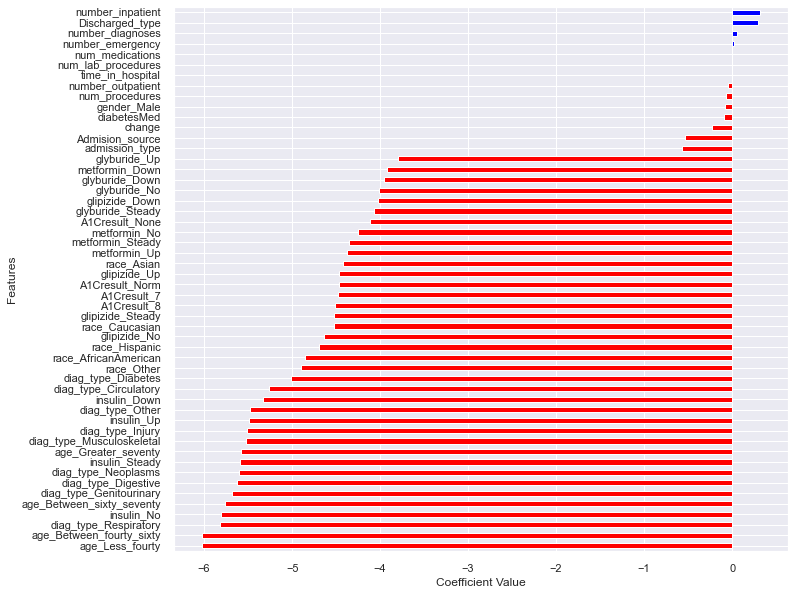

In [26]:
coeff = list(classifier.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['coef'] = coeff
features.sort_values(by=['coef'], ascending=True, inplace=True)
features['positive'] = features['coef'] > 0
features.set_index('Features', inplace=True)
features.coef.plot(kind='barh', figsize=(11, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Coefficient Value')

In [27]:
p_values= list(f_regression(X_train, y_train,center=True)[1])
features['p-values'] = p_values
features['odds'] = np.exp(features['coef'])
features=features.drop(['positive'], axis=1)
features

,coef,p-values,odds
Features,,,
age_Less_fourty,-6.027045,2.575872e-21,0.002413
age_Between_fourty_sixty,-6.018576,3.615300e-62,0.002433
diag_type_Respiratory,-5.813780,1.540686e-221,0.002986
insulin_No,-5.802485,9.974274e-53,0.003020
age_Between_sixty_seventy,-5.757672,8.076548e-52,0.003158
diag_type_Genitourinary,-5.678561,3.030946e-22,0.003418
diag_type_Digestive,-5.625672,3.862252e-145,0.003604
diag_type_Neoplasms,-5.601208,6.805381e-70,0.003693
insulin_Steady,-5.593660,0.000000e+00,0.003721


### 2. KNeighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=200)
classifier.fit(X_train, y_train)
k_prediction = classifier.predict(X_test)
model_performance(k_prediction)

              precision    recall  f1-score   support

           0      0.799     0.369     0.505     10423
           1      0.590     0.907     0.715     10422

    accuracy                          0.638     20845
   macro avg      0.695     0.638     0.610     20845
weighted avg      0.695     0.638     0.610     20845

Confusion Matrix: 
 [[3849 6574]
 [ 966 9456]] 

True Negative: 3849
False Positive: 6574
False Negative: 966
True Positive: 9456
Correct Predictions 63.8 %


### 3. Random Forest

In [29]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
random_f_prediction=clf.predict(X_test)
model_performance(random_f_prediction)

              precision    recall  f1-score   support

           0      0.927     0.998     0.961     10423
           1      0.998     0.922     0.958     10422

    accuracy                          0.960     20845
   macro avg      0.963     0.960     0.960     20845
weighted avg      0.963     0.960     0.960     20845

Confusion Matrix: 
 [[10402    21]
 [  814  9608]] 

True Negative: 10402
False Positive: 21
False Negative: 814
True Positive: 9608
Correct Predictions 96.0 %


In [30]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

num_lab_procedures           0.056444
age_Between_fourty_sixty     0.054362
num_medications              0.048849
insulin_No                   0.045055
age_Greater_seventy          0.044987
insulin_Steady               0.041849
age_Between_sixty_seventy    0.040685
time_in_hospital             0.034359
diag_type_Respiratory        0.030104
metformin_No                 0.029542
age_Less_fourty              0.028841
diag_type_Other              0.028023
admission_type               0.026465
diag_type_Circulatory        0.026405
race_AfricanAmerican         0.026251
Admision_source              0.025778
number_diagnoses             0.025223
num_procedures               0.025005
gender_Male                  0.022992
diag_type_Digestive          0.022563
change                       0.022299
metformin_Steady             0.022152
race_Caucasian               0.021869
insulin_Up                   0.020551
insulin_Down                 0.019503
glipizide_No                 0.017372
number_inpat

### 4. Decision Tree Classifier

In [31]:
tree = DecisionTreeClassifier(max_depth=20, random_state=42) # vamos a usar un árbol de profundidad 2
tree.fit(X_train, y_train)
pred_tree=tree.predict(X_test) 
model_performance(pred_tree)

              precision    recall  f1-score   support

           0      0.924     0.917     0.921     10423
           1      0.918     0.925     0.921     10422

    accuracy                          0.921     20845
   macro avg      0.921     0.921     0.921     20845
weighted avg      0.921     0.921     0.921     20845

Confusion Matrix: 
 [[9559  864]
 [ 786 9636]] 

True Negative: 9559
False Positive: 864
False Negative: 786
True Positive: 9636
Correct Predictions 92.1 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


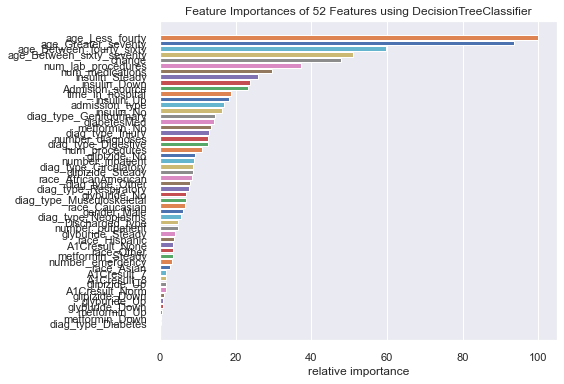

<AxesSubplot:title={'center':'Feature Importances of 52 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [32]:
viz = FeatureImportances(tree)
viz.fit(X_res, y_res)
viz.show()